# Part II - (Ford GoBike Exploration Data Analysis)
## by (Muhammed Balogun)

## Investigation Overview


> In this project, I want to study how duration of bike ride depends on member gender, user type, bike share for all trip, start hour, start day, end hour and end day of ride.



## Dataset Overview

> The Ford GoBike data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset is made up of 183412 observations with 16 columns. Nine additional columns were created, bring the total columns in the dataset to 25.

> The main feature of interest is the duration_min and how other features contribute to the length of ride. The features that will help to support the main feature of interest are; start_day, end_day, start_hour, end_hour, user_type, member_gender, member_birth_year and bike_share_for_all_trip.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_df_clean = pd.read_csv('fordgobike_clean_data')
bike_df_clean.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,duration_min,start_hour,start_day,start_week,start_month,end_hour,end_day,end_week,end_month
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,No,869.75,17,Thursday,9,February,8,Friday,9,March
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,...,No,708.68,18,Thursday,9,February,6,Friday,9,March
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,No,1030.90,12,Thursday,9,February,5,Friday,9,March
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,No,608.17,17,Thursday,9,February,4,Friday,9,March
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,Yes,26.42,23,Thursday,9,February,0,Friday,9,March


## Distribution of Member Gender, User Type and Bike Share for All Trip

> Most member in the dataset identify themselves as either male or female while very few members have other sex classification. It can be observed that there are more male bike riders than there are female riders.

> There are two bike user types in the dataset; Customer and Subscribers. Most of the bike users are subscribers

> Only few bike users share their ride during the whole trip.

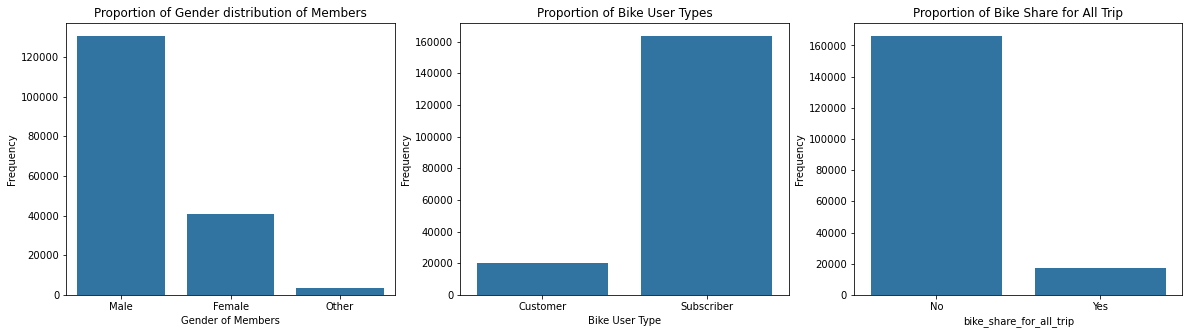

In [20]:
# set figsize
plt.figure(figsize = [20, 5])

# choose a base color
base_color = sns.color_palette()[0]

# count the frequency of each unique value
freq = bike_df_clean['member_gender'].value_counts()

# get indexes of the series
gen_order = freq.index

# plot bar chart in decreasing order of frequency
plt.subplot(1, 3, 1)
sns.countplot(data=bike_df_clean, 
              x='member_gender', 
              color=base_color, 
              order=gen_order)
plt.xlabel('Gender of Members')
plt.ylabel('Frequency')
plt.title('Proportion of Gender distribution of Members');

plt.subplot(1, 3, 2)
sns.countplot(data=bike_df_clean, x='user_type', color=base_color) 
plt.xlabel('Bike User Type')
plt.ylabel('Frequency')
plt.title('Proportion of Bike User Types');

plt.subplot(1, 3, 3)
sns.countplot(data=bike_df_clean, x='bike_share_for_all_trip', color=base_color) 
plt.ylabel('Frequency')
plt.title('Proportion of Bike Share for All Trip');

## Distribution of Duration of Ride

> Using a log scale, the distrubution of duration per seconds value was further verified to be right-skewed with majority of the users at the left part of the chart.

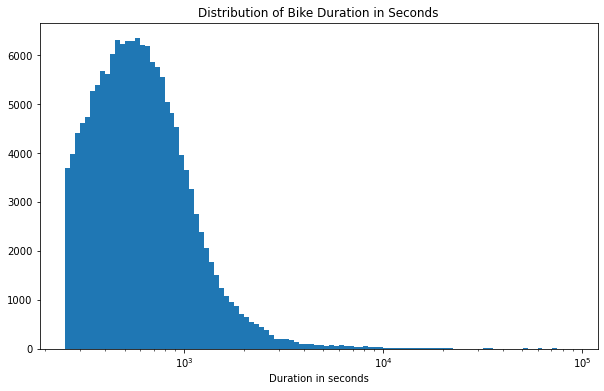

In [18]:
# the distribution is right skewed with long tail, a log scale should help to elucidate the distribution further
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike_df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=(10, 6))
plt.hist(data =bike_df_clean, x ='duration_sec', bins=bins)
plt.xscale('log')
plt.xlabel('Duration in seconds')
plt.title('Distribution of Bike Duration in Seconds');

## Top Ten Start Station with The Highest Frequency

> The start station name with the highest freqency of use is the **Market St at 10th St** followed by **San Francisco Caltrain Station** and so on as it presented in the chart below.

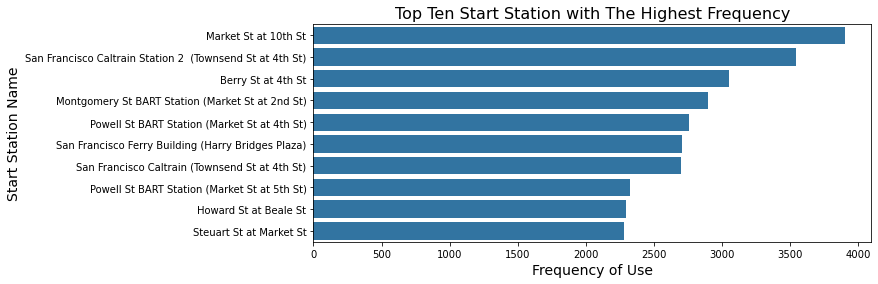

In [15]:
# choose a base color
base_color = sns.color_palette()[0]

# count the frequency of each unique value
freq = bike_df_clean['start_station_name'].value_counts()[:10]

# get indexes of the series
order = freq.index

# plot bar chart in decreasing order of frequency
plt.figure(figsize=(10, 4))
sns.countplot(data=bike_df_clean, 
              y='start_station_name', 
              color=base_color, 
              order=order)
plt.ylabel('Start Station Name', fontsize=14)
plt.xlabel('Frequency of Use', fontsize=14)
plt.title('Top Ten Start Station with The Highest Frequency', fontsize=16);

## Top Ten End Station with The Highest Frequency

> The start station name with the highest freqency of use is the **San Francisco Caltrain Station** followed by **Market St at 10th St** and so on as it presented in the chart above.

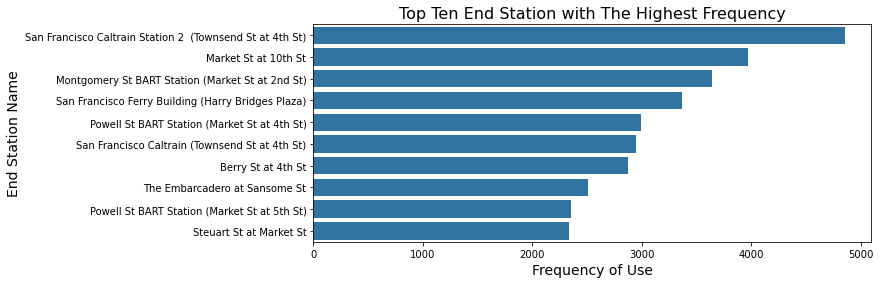

In [16]:
# choose a base color
base_color = sns.color_palette()[0]

# count the frequency of each unique value
freq = bike_df_clean['end_station_name'].value_counts()[:10]

# get indexes of the series
order = freq.index

# plot bar chart in decreasing order of frequency
plt.figure(figsize=(10, 4))
sns.countplot(data=bike_df_clean, 
              y='end_station_name', 
              color=base_color, 
              order=order)
plt.ylabel('End Station Name', fontsize=14)
plt.xlabel('Frequency of Use', fontsize=14)
plt.title('Top Ten End Station with The Highest Frequency', fontsize=16);

## Relationship between User Type and Ride Duration

> The median duration per minute for customers are higher than that of the subscribers, but subscribers tends to spend more time on ride than customers.

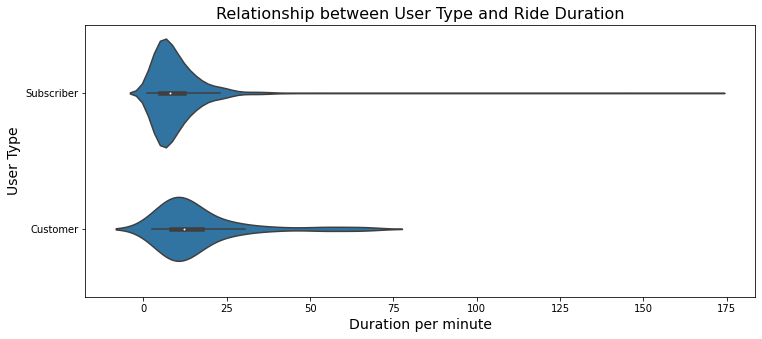

In [23]:
# set random seed for reproductivity
np.random.seed(70)

# make a dataset of 1000 samples
bike_df_clean_samp = bike_df_clean.sample(n=1000)

# create boxplot to view relationship
plt.figure(figsize=[12, 5])
sns.violinplot(data=bike_df_clean_samp, x='duration_min', y='user_type', color=base_color)
plt.xlabel('Duration per minute', fontsize=14)
plt.ylabel('User Type', fontsize=14)
plt.title('Relationship between User Type and Ride Duration', fontsize=16);

## Relationship between Gender of Members and Ride Duration

> The members with other sex have higher median duration per minute of ride out the three sex classification. However, female riders tends to spend more minutes of ride among them.

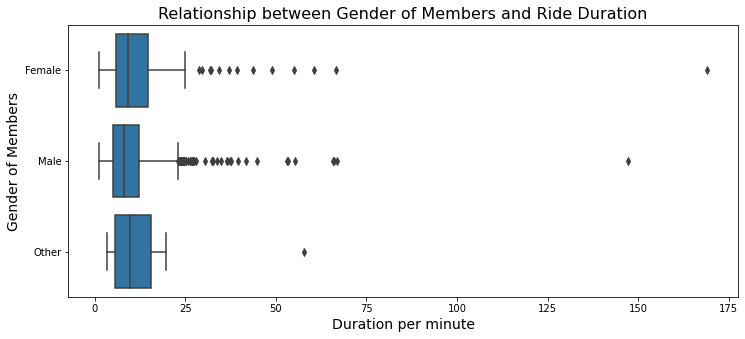

In [24]:
# set random seed for reproductivity
np.random.seed(70)

# make a dataset of 1000 samples
bike_df_clean_samp = bike_df_clean.sample(n=1000)

# create boxplot to view relationship
plt.figure(figsize=[12, 5])
sns.boxplot(data=bike_df_clean_samp, x='duration_min', y='member_gender', color=base_color)
plt.xlabel('Duration per minute', fontsize=14)
plt.ylabel('Gender of Members', fontsize=14)
plt.title('Relationship between Gender of Members and Ride Duration', fontsize=16);

## Duration of Rides against Gender of Members and User Type

> In all the gender classification, customer user types spend more time on ride than subsciber user types. The other sex types have higher ride duration followed by the female riders. The male riders seem to spend the least time on the journey.

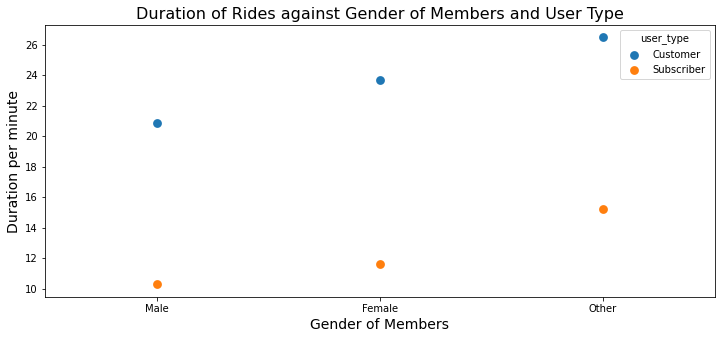

In [22]:
plt.figure(figsize=[12, 5])
sns.pointplot(
    data=bike_df_clean,
    x="member_gender", 
    y="duration_min",
    hue="user_type",
    ci=None,
    order=["Male", "Female", "Other"],
    join=False
)
plt.xlabel('Gender of Members', fontsize=14)
plt.ylabel('Duration per minute', fontsize=14)
plt.title('Duration of Rides against Gender of Members and User Type', fontsize=16);

## Duration of Rides against Start Day and User Type

> The behaviour of Subscriber user types is approximately the same on each start day of ride while Customer user types spend more time on ride on Saturday and Sunday.

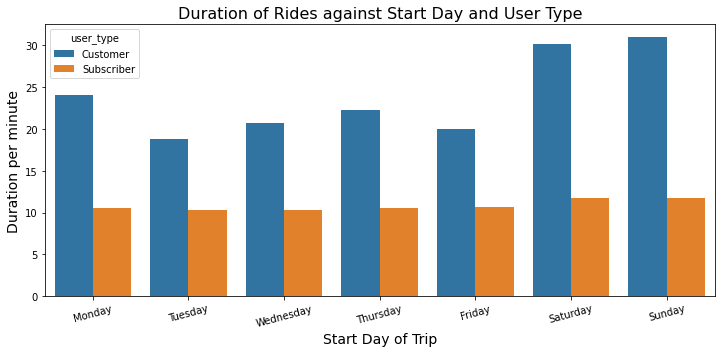

In [25]:
# set order of values
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# set figure size
plt.figure(figsize=[12, 5])

sns.barplot(
    data=bike_df_clean,
    x="start_day", 
    y="duration_min",
    hue="user_type",
    ci=None,
    order=order
);
plt.xticks(rotation=15)
plt.xlabel('Start Day of Trip', fontsize=14)
plt.ylabel('Duration per minute', fontsize=14)
plt.title('Duration of Rides against Start Day and User Type', fontsize=16);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Ford_GoBike_Exploration_Data_Analysis.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
